🏥 Healthcare Exploratory Data Analysis
📁 Loading cleaned data...
✅ Data loaded:
   • Patients: 2000
   • Treatments: 4552
   • Facilities: 50
   • Merged records: 4752

🔍 Dataset Overview:

Patients Summary:
               age              admission_date     severity  \
count  2000.000000                        2000  2000.000000   
mean     52.626000  2023-07-05 02:07:26.400000     2.505000   
min      18.000000         2023-01-01 00:00:00     1.000000   
25%      34.000000         2023-04-02 00:00:00     1.000000   
50%      52.000000         2023-07-08 00:00:00     3.000000   
75%      71.000000         2023-10-02 00:00:00     4.000000   
max      89.000000         2024-01-01 00:00:00     4.000000   
std      20.728072                         NaN     1.130758   

                   discharge_date  length_of_stay  readmission_30_days  
count                        2000     2000.000000          2000.000000  
mean   2023-07-20 13:45:07.200000       15.484500             0.339500  
min  

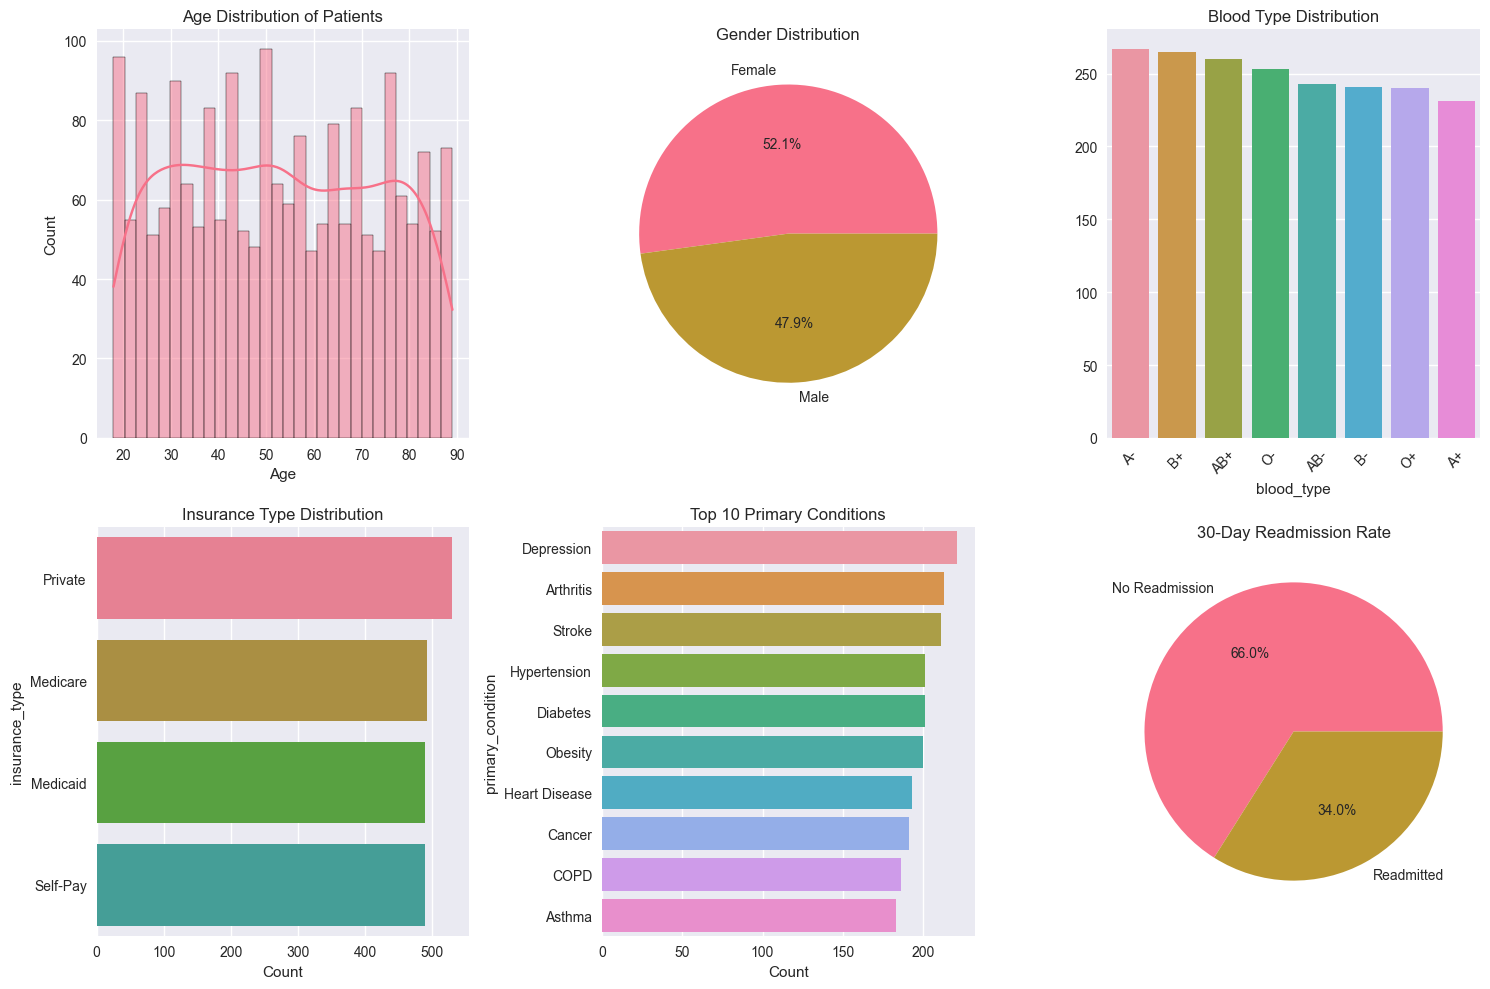


🏢 FACILITY PERFORMANCE ANALYSIS


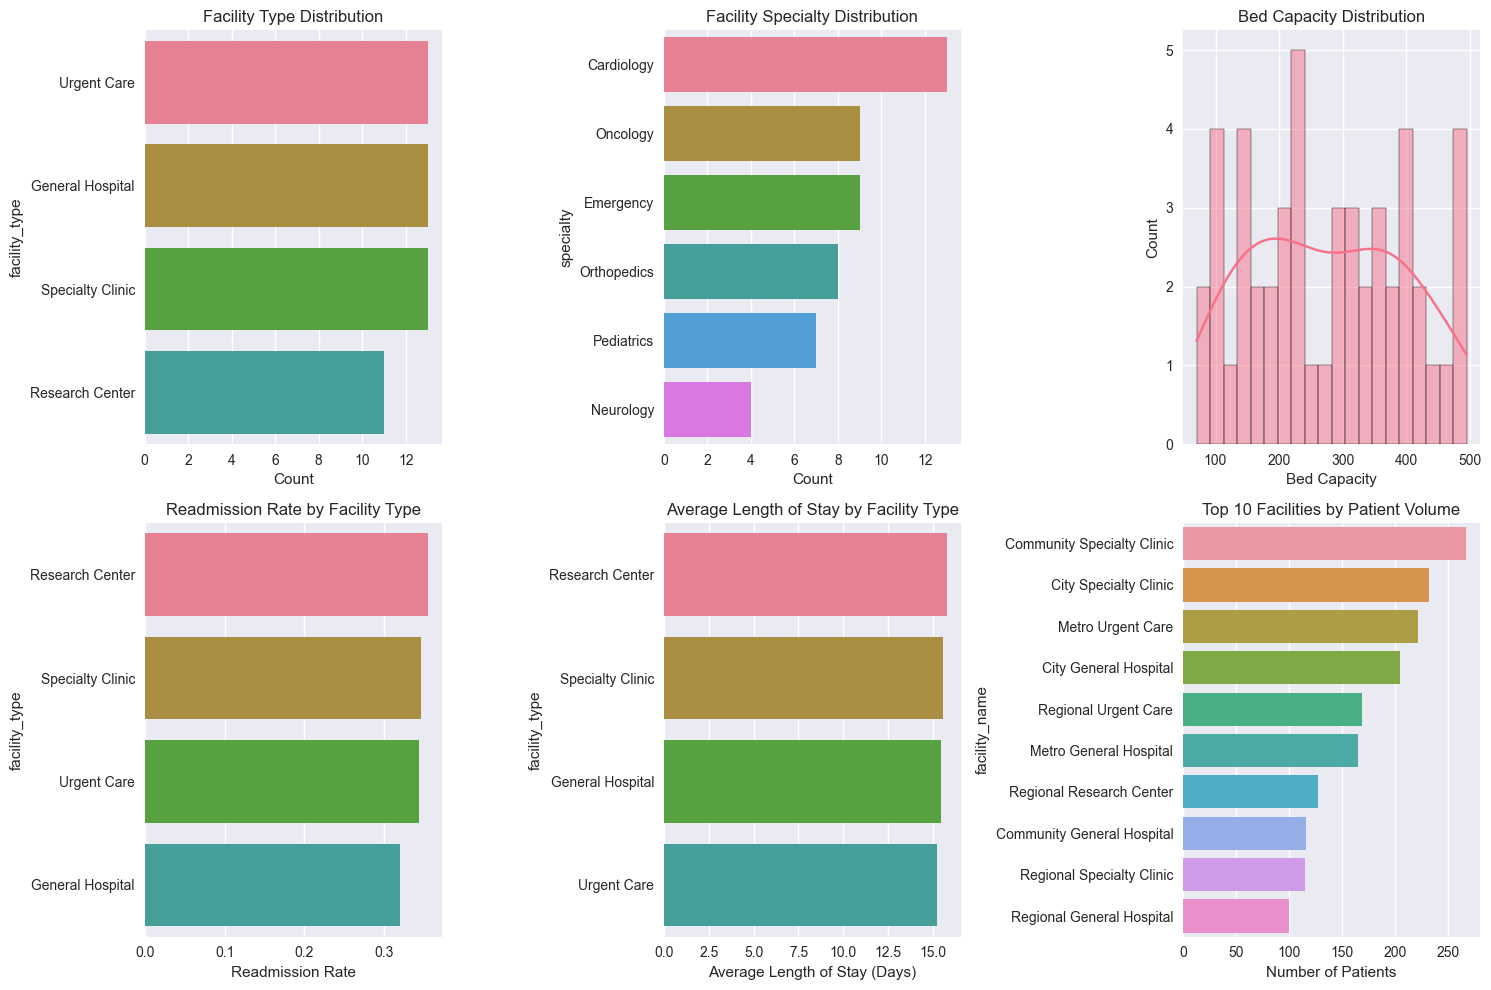


📈 TIME SERIES ANALYSIS


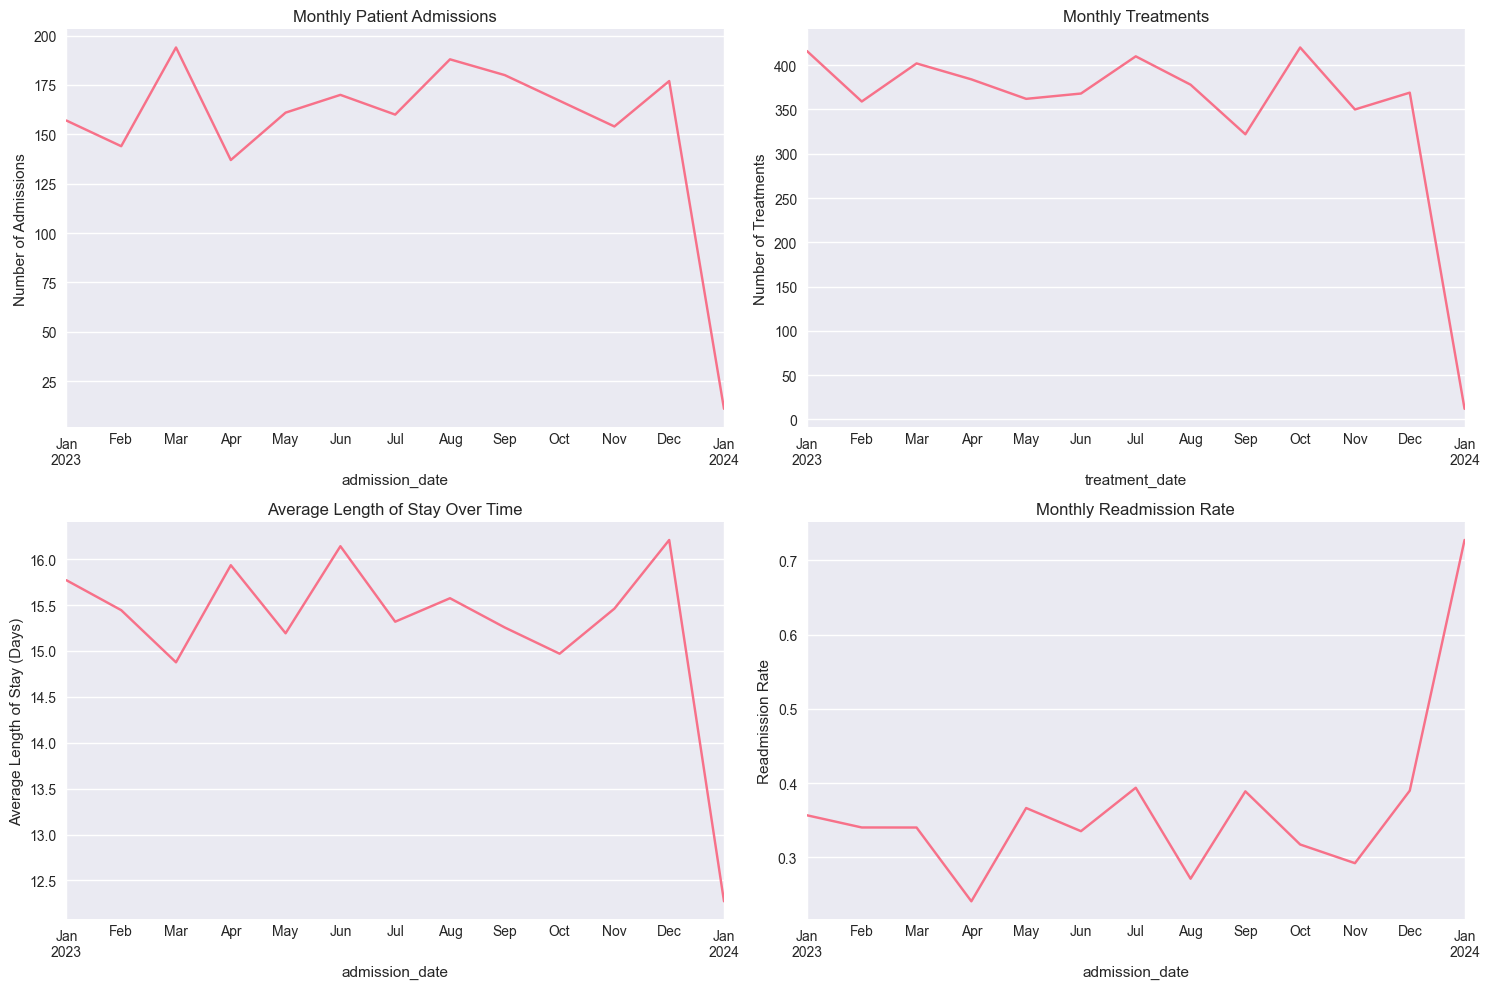


🔗 CORRELATION ANALYSIS


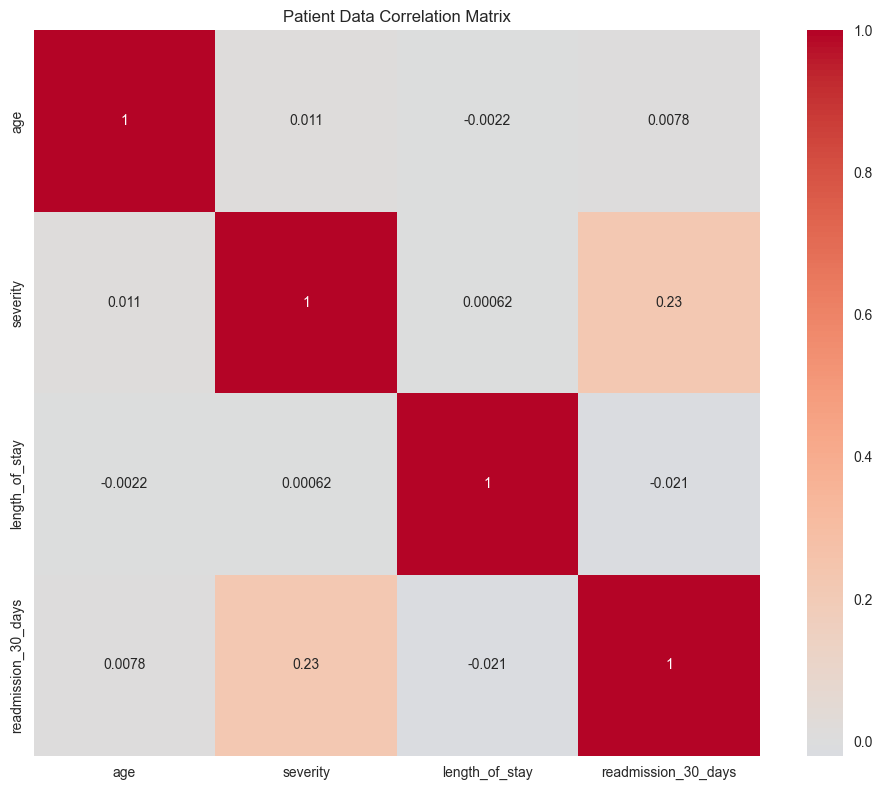


📊 Key Relationships:
• Age vs Length of Stay correlation: -0.002
• Age vs Readmission correlation: 0.008
• Treatment Cost vs Duration correlation: 0.019

📊 INTERACTIVE VISUALIZATIONS



💡 KEY INSIGHTS AND FINDINGS
👥 Patient Demographics:
   • Average patient age: 52.6 years
   • Gender distribution: {'Female': 1043, 'Male': 957}
   • Most common condition: Depression

💊 Treatment Analysis:
   • Average treatment cost: $188.01
   • Treatment success rate: 24.7%
   • Most common treatment: Rehabilitation

🏢 Facility Performance:
   • Average bed capacity: 277 beds
   • Busiest facility: FAC1044
   • Number of facility types: 4

📈 Readmission Analysis:
   • Overall readmission rate: 34.0%
   • Conditions with highest readmission: ['Diabetes', 'Heart Disease', 'Asthma']

💰 Cost Analysis:
   • Total treatment cost: $855,830.72
   • Most expensive treatment type: Rehabilitation

🔍 DATA QUALITY ASSESSMENT

PATIENTS Data Quality:
  • Total records: 2,000
  • Missing values: 0
  • Duplicate records: 0
  • Data types: 3 different types
  • Numerical columns: 4

TREATMENTS Data Quality:
  • Total records: 4,552
  • Missing values: 0
  • Duplicate records: 0
  • Data types: 5 di

In [2]:
# Healthcare - Exploratory Data Analysis
# Analyzing patient outcomes, treatment effectiveness, and facility performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("🏥 Healthcare Exploratory Data Analysis")
print("=" * 60)

# Load cleaned data
print("📁 Loading cleaned data...")
patients = pd.read_csv('../../data/processed/patients_clean.csv')
treatments = pd.read_csv('../../data/processed/treatments_clean.csv')
facilities = pd.read_csv('../../data/processed/facilities_clean.csv')
merged_data = pd.read_csv('../../data/processed/healthcare_merged.csv')

print(f"✅ Data loaded:")
print(f"   • Patients: {len(patients)}")
print(f"   • Treatments: {len(treatments)}")
print(f"   • Facilities: {len(facilities)}")
print(f"   • Merged records: {len(merged_data)}")

# Convert dates for time series analysis
patients["admission_date"] = pd.to_datetime(patients["admission_date"])
patients["discharge_date"] = pd.to_datetime(patients["discharge_date"])
treatments["treatment_date"] = pd.to_datetime(treatments["treatment_date"])
merged_data["admission_date"] = pd.to_datetime(merged_data["admission_date"])

# Basic Dataset Overview
print("\n🔍 Dataset Overview:")
print("\nPatients Summary:")
print(patients.describe())

print("\nTreatments Summary:")
print(treatments.describe())

print("\nFacilities Summary:")
print(facilities.describe())

# 1. Patient Demographics Analysis
print("\n👥 PATIENT DEMOGRAPHICS ANALYSIS")
print("=" * 40)

# Age distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(patients["age"], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")

# Gender distribution
plt.subplot(2, 3, 2)
gender_counts = patients["gender"].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")

# Blood type distribution
plt.subplot(2, 3, 3)
blood_type_counts = patients["blood_type"].value_counts()
sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values)
plt.title("Blood Type Distribution")
plt.xticks(rotation=45)

# Insurance type
plt.subplot(2, 3, 4)
insurance_counts = patients["insurance_type"].value_counts()
sns.barplot(x=insurance_counts.values, y=insurance_counts.index)
plt.title("Insurance Type Distribution")
plt.xlabel("Count")

# Primary conditions
plt.subplot(2, 3, 5)
condition_counts = patients["primary_condition"].value_counts().head(10)
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title("Top 10 Primary Conditions")
plt.xlabel("Count")

# Readmission rate
plt.subplot(2, 3, 6)
readmission_rate = patients["readmission_30_days"].value_counts(normalize=True)
plt.pie(
    readmission_rate.values, labels=["No Readmission", "Readmitted"], autopct="%1.1f%%"
)
plt.title("30-Day Readmission Rate")

plt.tight_layout()
plt.show()

# 3. Facility Performance Analysis
print("\n🏢 FACILITY PERFORMANCE ANALYSIS")
print("=" * 40)

# Merge facilities with patient data for analysis
facility_performance = patients.merge(facilities, on="facility_id")

plt.figure(figsize=(15, 10))

# Facility types
plt.subplot(2, 3, 1)
facility_type_counts = facilities["facility_type"].value_counts()
sns.barplot(x=facility_type_counts.values, y=facility_type_counts.index)
plt.title("Facility Type Distribution")
plt.xlabel("Count")

# Specialties
plt.subplot(2, 3, 2)
specialty_counts = facilities["specialty"].value_counts()
sns.barplot(x=specialty_counts.values, y=specialty_counts.index)
plt.title("Facility Specialty Distribution")
plt.xlabel("Count")

# Bed capacity distribution
plt.subplot(2, 3, 3)
sns.histplot(facilities["bed_capacity"], bins=20, kde=True)
plt.title("Bed Capacity Distribution")
plt.xlabel("Bed Capacity")

# Readmission rate by facility type
plt.subplot(2, 3, 4)
readmission_by_facility = (
    facility_performance.groupby("facility_type")["readmission_30_days"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=readmission_by_facility.values, y=readmission_by_facility.index)
plt.title("Readmission Rate by Facility Type")
plt.xlabel("Readmission Rate")

# Average length of stay by facility type
plt.subplot(2, 3, 5)
los_by_facility = (
    facility_performance.groupby("facility_type")["length_of_stay"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=los_by_facility.values, y=los_by_facility.index)
plt.title("Average Length of Stay by Facility Type")
plt.xlabel("Average Length of Stay (Days)")

# Patient volume by facility
plt.subplot(2, 3, 6)
patient_volume = facility_performance["facility_name"].value_counts().head(10)
sns.barplot(x=patient_volume.values, y=patient_volume.index)
plt.title("Top 10 Facilities by Patient Volume")
plt.xlabel("Number of Patients")

plt.tight_layout()
plt.show()

# 4. Time Series Analysis
print("\n📈 TIME SERIES ANALYSIS")
print("=" * 40)

# Monthly admissions
monthly_admissions = patients.set_index("admission_date").resample("M").size()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
monthly_admissions.plot(kind="line", title="Monthly Patient Admissions", grid=True)
plt.ylabel("Number of Admissions")

# Monthly treatments
monthly_treatments = treatments.set_index("treatment_date").resample("M").size()

plt.subplot(2, 2, 2)
monthly_treatments.plot(kind="line", title="Monthly Treatments", grid=True)
plt.ylabel("Number of Treatments")

# Average length of stay over time
monthly_los = (
    patients.set_index("admission_date").resample("M")["length_of_stay"].mean()
)

plt.subplot(2, 2, 3)
monthly_los.plot(kind="line", title="Average Length of Stay Over Time", grid=True)
plt.ylabel("Average Length of Stay (Days)")

# Readmission rate over time
monthly_readmission = (
    patients.set_index("admission_date").resample("M")["readmission_30_days"].mean()
)

plt.subplot(2, 2, 4)
monthly_readmission.plot(kind="line", title="Monthly Readmission Rate", grid=True)
plt.ylabel("Readmission Rate")

plt.tight_layout()
plt.show()
# 5. Correlation and Relationship Analysis
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 40)

# Select numerical columns for correlation
numerical_cols = patients.select_dtypes(include=[np.number]).columns
correlation_matrix = patients[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True)
plt.title("Patient Data Correlation Matrix")
plt.tight_layout()
plt.show()

# Key relationships
print("\n📊 Key Relationships:")

# Age vs Length of Stay
age_los_corr = patients["age"].corr(patients["length_of_stay"])
print(f"• Age vs Length of Stay correlation: {age_los_corr:.3f}")

# Age vs Readmission
age_readmission_corr = patients["age"].corr(patients["readmission_30_days"])
print(f"• Age vs Readmission correlation: {age_readmission_corr:.3f}")

# Treatment cost vs duration
cost_duration_corr = treatments["cost"].corr(treatments["duration_days"])
print(f"• Treatment Cost vs Duration correlation: {cost_duration_corr:.3f}")

# 6. Advanced Visualizations with Plotly
print("\n📊 INTERACTIVE VISUALIZATIONS")
print("=" * 40)

# Age distribution by gender
fig = px.histogram(
    patients,
    x="age",
    color="gender",
    nbins=30,
    title="Age Distribution by Gender",
    labels={"age": "Age", "count": "Number of Patients"},
)
fig.show()

# Treatment cost by type and outcome
fig = px.box(
    treatments,
    x="treatment_type",
    y="cost",
    color="outcome",
    title="Treatment Cost by Type and Outcome",
    labels={"treatment_type": "Treatment Type", "cost": "Cost ($)"},
)
fig.show()

# Readmission rate by condition and insurance
readmission_analysis = (
    patients.groupby(["primary_condition", "insurance_type"])["readmission_30_days"]
    .mean()
    .reset_index()
)
fig = px.bar(
    readmission_analysis,
    x="primary_condition",
    y="readmission_30_days",
    color="insurance_type",
    title="Readmission Rate by Condition and Insurance Type",
    labels={
        "primary_condition": "Condition",
        "readmission_30_days": "Readmission Rate",
    },
)
fig.show()

# 7. Statistical Insights and Key Findings
print("\n💡 KEY INSIGHTS AND FINDINGS")
print("=" * 50)

# Patient demographics insights
avg_age = patients["age"].mean()
print(f"👥 Patient Demographics:")
print(f"   • Average patient age: {avg_age:.1f} years")
print(f"   • Gender distribution: {patients['gender'].value_counts().to_dict()}")
print(f"   • Most common condition: {patients['primary_condition'].mode().iloc[0]}")

# Treatment insights
avg_treatment_cost = treatments["cost"].mean()
success_rate = (treatments["outcome"] == "Successful").mean()
print(f"\n💊 Treatment Analysis:")
print(f"   • Average treatment cost: ${avg_treatment_cost:.2f}")
print(f"   • Treatment success rate: {success_rate*100:.1f}%")
print(f"   • Most common treatment: {treatments['treatment_type'].mode().iloc[0]}")

# Facility insights
avg_bed_capacity = facilities["bed_capacity"].mean()
busiest_facility = patients["facility_id"].value_counts().index[0]
print(f"\n🏢 Facility Performance:")
print(f"   • Average bed capacity: {avg_bed_capacity:.0f} beds")
print(f"   • Busiest facility: {busiest_facility}")
print(f"   • Number of facility types: {facilities['facility_type'].nunique()}")

# Readmission insights
readmission_rate = patients["readmission_30_days"].mean()
print(f"\n📈 Readmission Analysis:")
print(f"   • Overall readmission rate: {readmission_rate*100:.1f}%")

# Identify high-risk groups
high_risk_conditions = (
    patients.groupby("primary_condition")["readmission_30_days"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
)
print(f"   • Conditions with highest readmission: {list(high_risk_conditions.index)}")

# Cost analysis
total_treatment_cost = treatments["cost"].sum()
print(f"\n💰 Cost Analysis:")
print(f"   • Total treatment cost: ${total_treatment_cost:,.2f}")
print(
    f"   • Most expensive treatment type: {treatments.groupby('treatment_type')['cost'].mean().idxmax()}"
)

# 8. Data Quality Assessment
print("\n🔍 DATA QUALITY ASSESSMENT")
print("=" * 40)


def assess_data_quality(df, df_name):
    """Assess data quality for a dataframe"""
    print(f"\n{df_name.upper()} Data Quality:")
    print(f"  • Total records: {len(df):,}")
    print(f"  • Missing values: {df.isnull().sum().sum()}")
    print(f"  • Duplicate records: {df.duplicated().sum()}")
    print(f"  • Data types: {df.dtypes.nunique()} different types")

    # Check for potential data issues
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        print(f"  • Numerical columns: {len(numerical_cols)}")
        for col in numerical_cols:
            if df[col].min() < 0:
                print(f"    ⚠️  Negative values in {col}")


assess_data_quality(patients, "Patients")
assess_data_quality(treatments, "Treatments")
assess_data_quality(facilities, "Facilities")

print("\n✅ EDA Complete! Next: Patient Analytics and Business Recommendations")